In [279]:
import numpy as np
import gymnasium as gym
import random
import time
from IPython.display import clear_output

In [278]:
import gc

# Your code here that may create objects to be garbage collected

# Manually force a garbage collection cycle
gc.collect()

3088

In [287]:
env = gym.make('FrozenLake-v1',map_name="4x4",render_mode='rgb_array')


In [288]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

In [289]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [290]:
q_table.shape

(16, 4)

In [291]:
num_episodes = 20000
max_steps_per_episode = 500

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

In [292]:
rewards_all_episodes = []
# Q-learning algorithm
for episode in range(num_episodes):
    state =env.reset()[0] 
    done = False
    reward_current_episode = 0
    # initialize new episode params
    for step in range(max_steps_per_episode): 
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = env.action_space.sample()
        # Take new action
        new_state, reward, done, truncated, info = env.step(action)
        # Update Q-table
        #print(new_state)
        #print(state[0],action)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        # Set new state
        state = new_state
        # Add new reward 
        reward_current_episode += reward 
        if done == True: 
            break

    # Exploration rate decay   
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(reward_current_episode)


In [293]:
# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
   # print(r)
    print(count, ": ", str(sum(r)/1000))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.04
2000 :  0.105
3000 :  0.208
4000 :  0.568
5000 :  0.607
6000 :  0.693
7000 :  0.729
8000 :  0.739
9000 :  0.704
10000 :  0.724
11000 :  0.695
12000 :  0.708
13000 :  0.705
14000 :  0.704
15000 :  0.709
16000 :  0.741
17000 :  0.723
18000 :  0.71
19000 :  0.708
20000 :  0.74


In [294]:
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[5.17549895e-01 5.05201953e-01 5.00425420e-01 4.92430205e-01]
 [3.38419154e-01 1.92744461e-01 1.77395460e-01 4.69096012e-01]
 [4.18596100e-01 2.47841564e-01 2.00461059e-01 2.98896319e-01]
 [1.26397200e-01 2.95538270e-05 2.65984443e-05 0.00000000e+00]
 [5.39964993e-01 4.40808509e-01 3.88807332e-01 3.64728695e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.42147948e-01 1.26673953e-01 2.08444846e-01 1.02126314e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.58515456e-01 4.52866011e-01 3.27669920e-01 5.76456693e-01]
 [3.54201283e-01 6.18541211e-01 4.31634711e-01 5.28102097e-01]
 [6.10228228e-01 3.36257834e-01 2.85655566e-01 2.24227880e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.59964125e-01 4.71973477e-01 7.27279152e-01 5.94136987e-01]
 [6.95595706e-01 8.90003414e-01 6.96766455e-01 7.83649985e-01]
 [0.00000000e+00 0.00000000e

<Axes: >

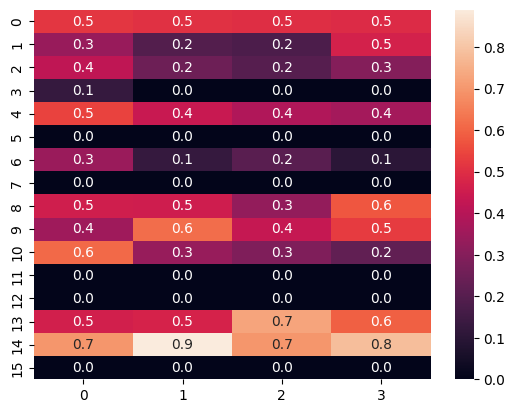

In [295]:
import seaborn as sns
sns.heatmap(q_table, annot=True, fmt=".1f")

In [296]:
# 0: LEFT

# 1: DOWN

# 2: RIGHT

# 3: UP



In [297]:
img=env.render()

In [298]:
import matplotlib.pyplot as plt

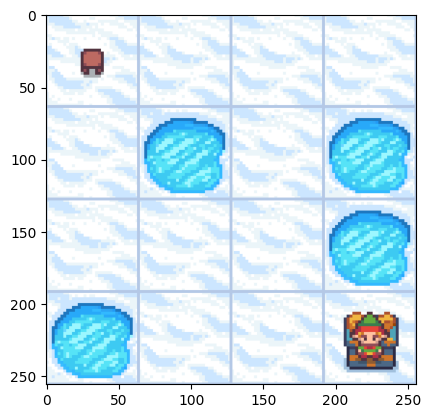

In [299]:
plt.imshow(img)
plt.show()